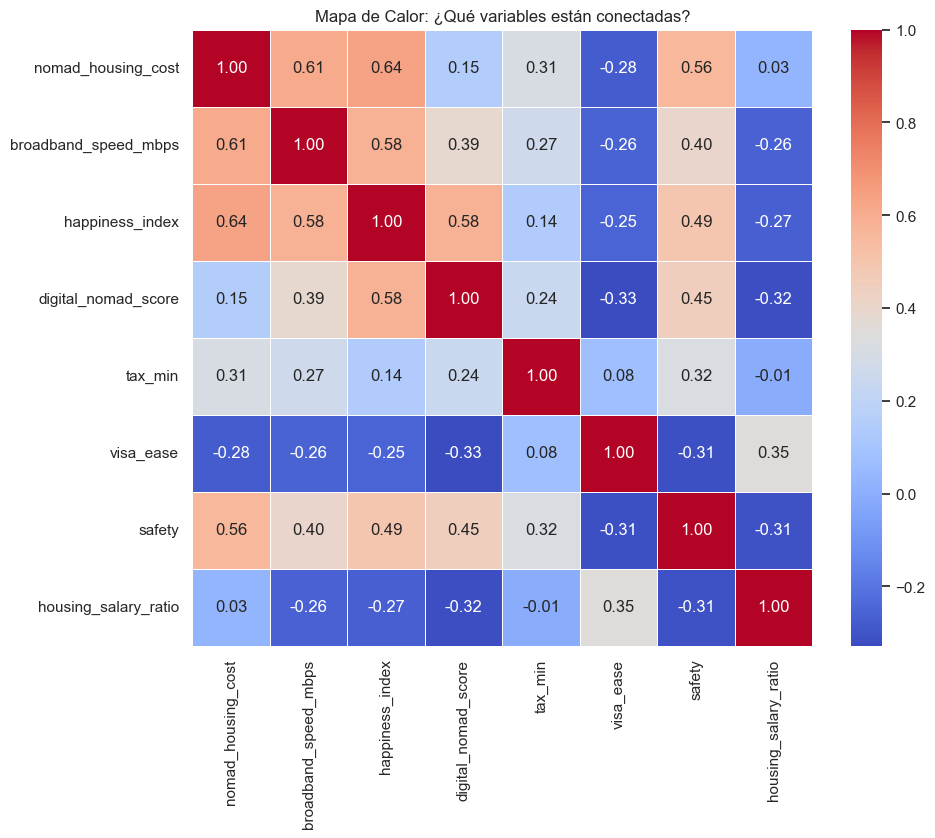

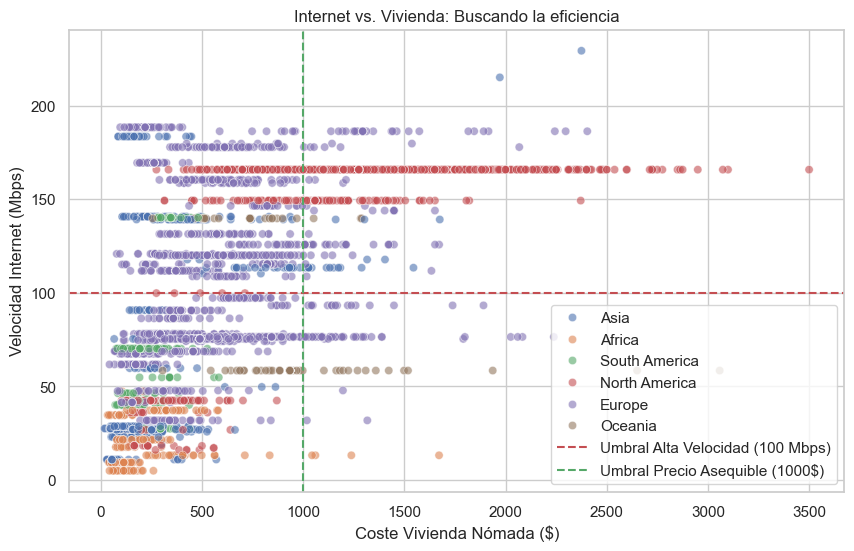

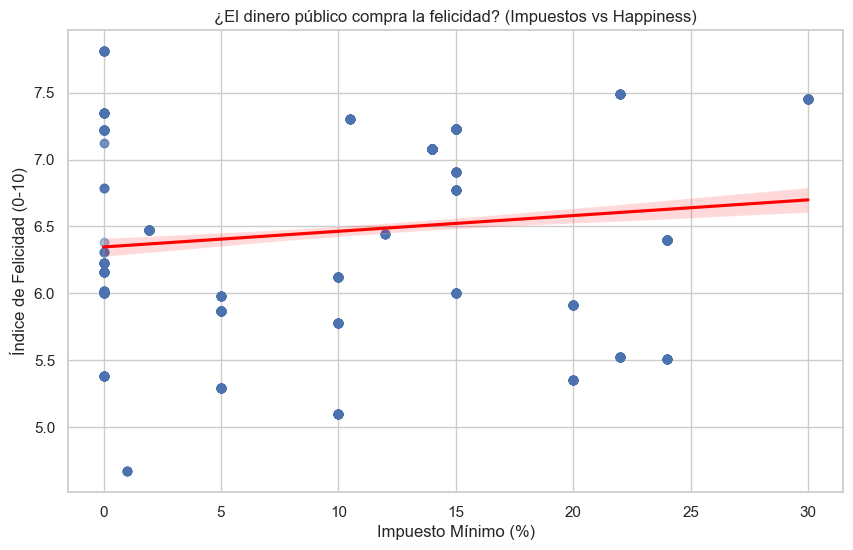

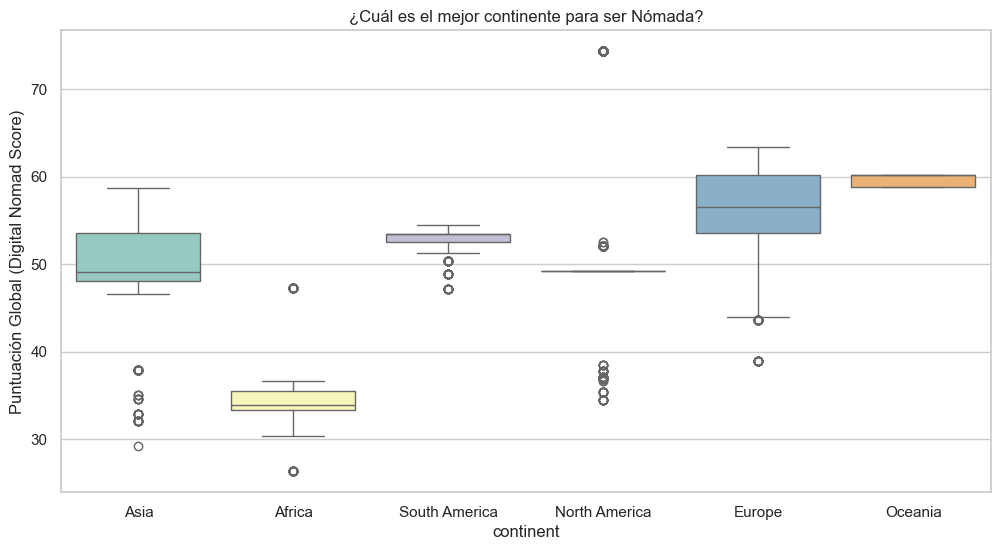

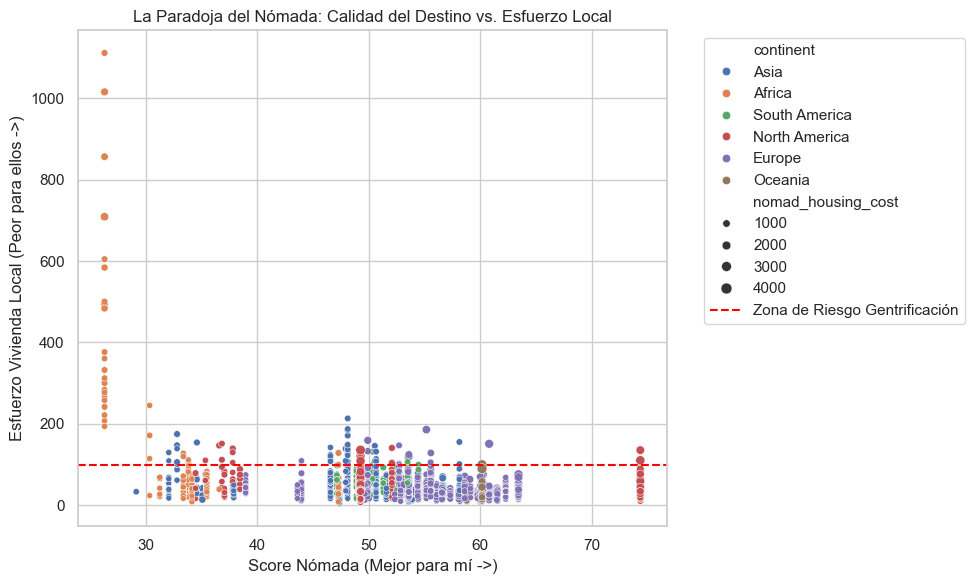

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Cargar el Dataset V2 
df = pd.read_csv('./data/MASTER_DATASET_EDA_V2.csv')
sns.set_theme(style="whitegrid")

# ==============================================================================
# BLOQUE 1: MATRIZ DE CORRELACIÓN (El Mapa General)
# ==============================================================================
# Seleccionamos solo las variables numéricas 'KPI'
cols_corr = [
    'nomad_housing_cost', 'broadband_speed_mbps', 'happiness_index', 
    'digital_nomad_score', 'tax_min', 'visa_ease', 'safety',
    'housing_salary_ratio' # La variable ética de Juan
]

plt.figure(figsize=(10, 8))
# Calculamos correlación
corr_matrix = df[cols_corr].corr()
# Pintamos
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Mapa de Calor: ¿Qué variables están conectadas?')
plt.show()

# ==============================================================================
# BLOQUE 2: SCATTER PLOTS (Buscando la "Zona Mágica")
# ==============================================================================

# A. INTERNET VS COSTE DE VIVIENDA
# ¿Dónde está el internet rápido y barato?
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='nomad_housing_cost', y='broadband_speed_mbps', hue='continent', alpha=0.6)
plt.title('Internet vs. Vivienda: Buscando la eficiencia')
plt.xlabel('Coste Vivienda Nómada ($)')
plt.ylabel('Velocidad Internet (Mbps)')
plt.axhline(y=100, color='r', linestyle='--', label='Umbral Alta Velocidad (100 Mbps)')
plt.axvline(x=1000, color='g', linestyle='--', label='Umbral Precio Asequible (1000$)')
plt.legend()
plt.show()

# B. FELICIDAD VS IMPUESTOS
# ¿Pagar impuestos da felicidad?
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='tax_min', y='happiness_index', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('¿El dinero público compra la felicidad? (Impuestos vs Happiness)')
plt.xlabel('Impuesto Mínimo (%)')
plt.ylabel('Índice de Felicidad (0-10)')
plt.show()

# ==============================================================================
# BLOQUE 3: ANÁLISIS POR CONTINENTES (Comparativa)
# ==============================================================================
# Comparamos el "Score Nómada" por continente
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='continent', y='digital_nomad_score', palette='Set3', hue='continent', legend=False)
plt.title('¿Cuál es el mejor continente para ser Nómada?')
plt.ylabel('Puntuación Global (Digital Nomad Score)')
plt.show()

# ==============================================================================
# BLOQUE 4: EL ANÁLISIS ÉTICO 
# ==============================================================================
# Relación entre "Qué bueno es el país para mí" vs "Qué difícil es para el local"
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='digital_nomad_score', y='housing_salary_ratio', hue='continent', size='nomad_housing_cost')
plt.title('La Paradoja del Nómada: Calidad del Destino vs. Esfuerzo Local')
plt.xlabel('Score Nómada (Mejor para mí ->)')
plt.ylabel('Esfuerzo Vivienda Local (Peor para ellos ->)')
# Línea de peligro ético
plt.axhline(y=100, color='red', linestyle='--', label='Zona de Riesgo Gentrificación')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()